## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path("./Resources/bitstamp.csv")
bitstamp = pd.read_csv(csvpath,
            index_col = 'Timestamp',
            parse_dates = True,
            infer_datetime_format = True)



### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_path = Path('./Resources/coinbase.csv')
coinbase = pd.read_csv(coinbase_path,
                      index_col = 'Timestamp',
                      parse_dates = True,
                      infer_datetime_format = True)


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635
2019-01-07 17:05:00,4006.01,4006.01,4005.50,$4005.5,2.699700,10814.241898,4005.719991
2019-01-07 17:06:00,4005.51,4006.01,4005.51,$4005.99,1.752778,7021.183546,4005.745614


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

In [7]:
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[: , "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")
bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [10]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()


2647

In [11]:
bitstamp.drop_duplicates(inplace=True)

In [12]:
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [14]:
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


In [15]:
coinbase.loc[: , 'Close'] = coinbase.loc[: , 'Close'].str.replace('$' , '')
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [16]:
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype('float')
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2019-01-07 17:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2019-01-07 17:05:00,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991
2019-01-07 17:06:00,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614


In [17]:
coinbase.duplicated().sum()

624

In [18]:
coinbase.drop_duplicates(inplace=True)

In [19]:
coinbase.duplicated().sum()


0

## Analyze the Dat

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


,Close
Timestamp,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54
2015-12-31 19:06:00,432.52


In [21]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()



,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [22]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()


,Close
count,1.347772e+06
mean,4.503924e+03
std,3.956149e+03
min,1.500000e+00
25%,7.888900e+02
50%,3.788990e+03
75%,6.929443e+03
max,1.966575e+04


In [23]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()


,Close
count,1.549523e+06
mean,4.091926e+03
std,3.913501e+03
min,6.000000e-02
25%,6.754000e+02
50%,2.710730e+03
75%,6.593500e+03
max,1.989199e+04


<AxesSubplot:title={'center':'bitstamp close price graph'}, xlabel='Timestamp'>

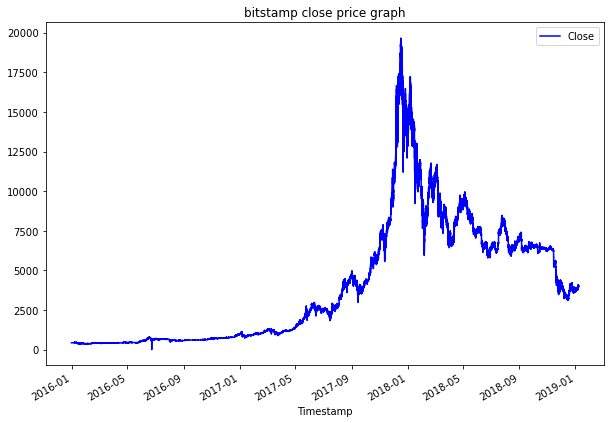

In [24]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind='line',figsize=(10,7),title= 'bitstamp close price graph', color= 'blue')


<AxesSubplot:title={'center':'coinbase close price graph'}, xlabel='Timestamp'>

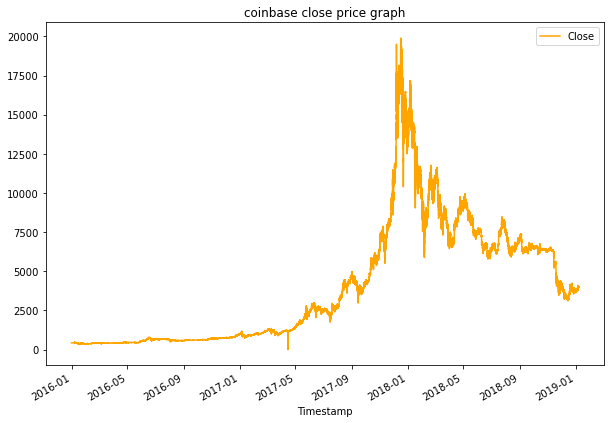

In [25]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind='line', figsize=(10,7), title='coinbase close price graph', color='orange')


<AxesSubplot:title={'center':'bitstamp vs. coinbase'}, xlabel='Timestamp'>

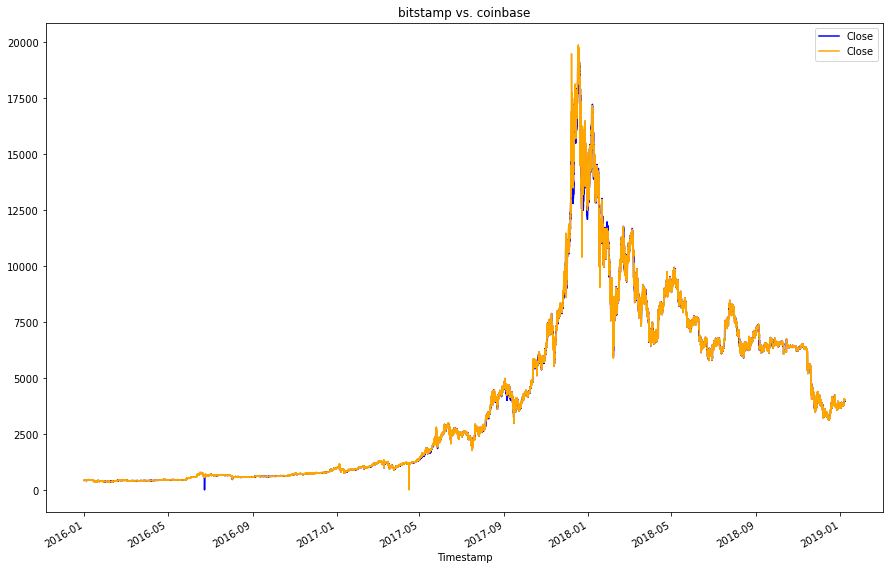

In [26]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.plot(legend=True, kind='line',figsize=(15,10),title= 'bitstamp vs. coinbase', color= 'blue', label= 'bitstamp')
coinbase_sliced.plot(legend= True, kind='line', figsize=(15,10), color='orange', label= 'coinbase', ax=ax)

<AxesSubplot:title={'center':'bitstamp vs. coinbase in Aug 2016'}, xlabel='Timestamp'>

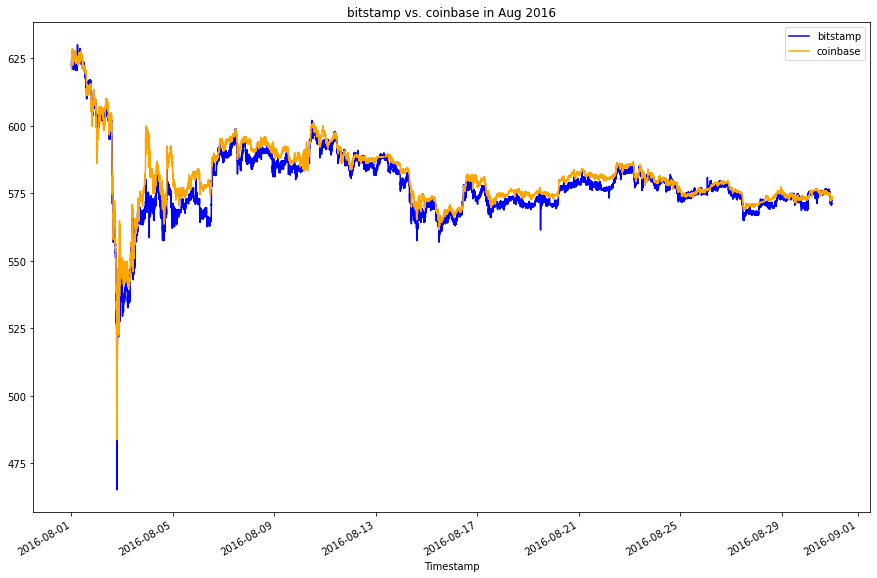

In [27]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp.loc['2016-08-01':'2016-08-30', 'Close'].plot(legend=True, kind='line',figsize=(15,10),title= 'bitstamp vs. coinbase in Aug 2016', color= 'blue', label= 'bitstamp')
coinbase.loc['2016-08-01':'2016-08-30', 'Close'].plot(legend= True, kind='line', figsize=(15,10), color='orange', label= 'coinbase', ax=ax)

<AxesSubplot:title={'center':'bitstamp vs. coinbase in Sep 2018'}, xlabel='Timestamp'>

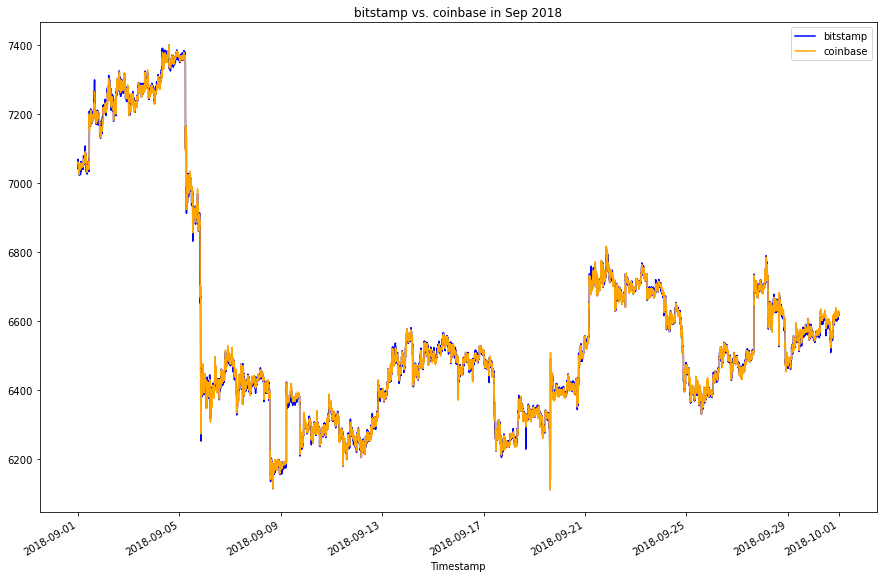

In [28]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax = bitstamp.loc['2018-09-01':'2018-09-30', 'Close'].plot(legend=True, kind='line',figsize=(15,10),title= 'bitstamp vs. coinbase in Jan 2018', color= 'blue', label= 'bitstamp')
coinbase.loc['2018-09-01':'2018-09-30', 'Close'].plot(legend= True, kind='line', figsize=(15,10), color='orange', label= 'coinbase', ax=ax)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # Based on the graph from different time period, it's hardly to tell there's a counter change. Both crypto currencies are acting the same way, it is just the difference
                of changing amount between them.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'bitstamp vs. coinbase on 2016-08-01'}, xlabel='Timestamp'>

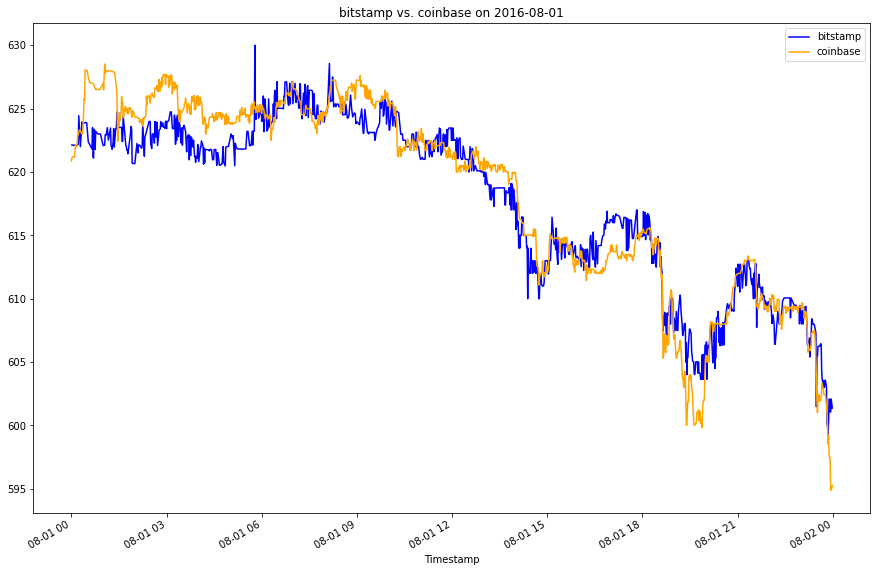

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp.loc['2016-08-01', 'Close'].plot(legend=True, kind='line',figsize=(15,10),title= 'bitstamp vs. coinbase on 2016-08-01', color= 'blue', label= 'bitstamp')
coinbase.loc['2016-08-01', 'Close'].plot(legend= True, kind='line', figsize=(15,10), color='orange', label= 'coinbase', ax=ax)


In [30]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early =  coinbase_sliced.loc['2016-08-01'] - bitstamp_sliced.loc['2016-08-01']

# Generate summary statistics for the early DataFrame
display(arbitrage_spread_early.describe())


,Close
count,936.000000
mean,0.345588
std,2.120735
min,-7.170000
25%,-0.892500
50%,0.320000
75%,1.790000
max,6.410000


<AxesSubplot:title={'center':'arbitrage spread for coinbase on 2016-08-01'}>

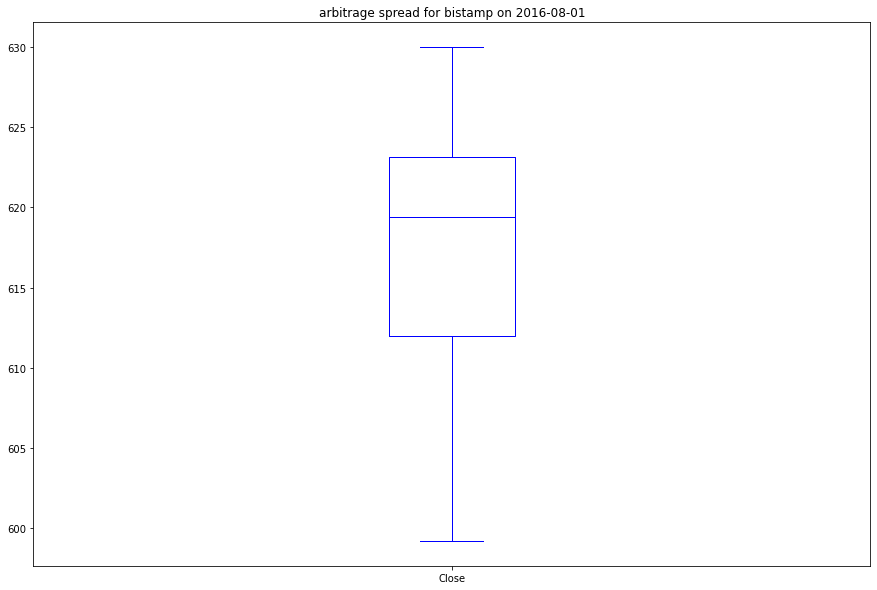

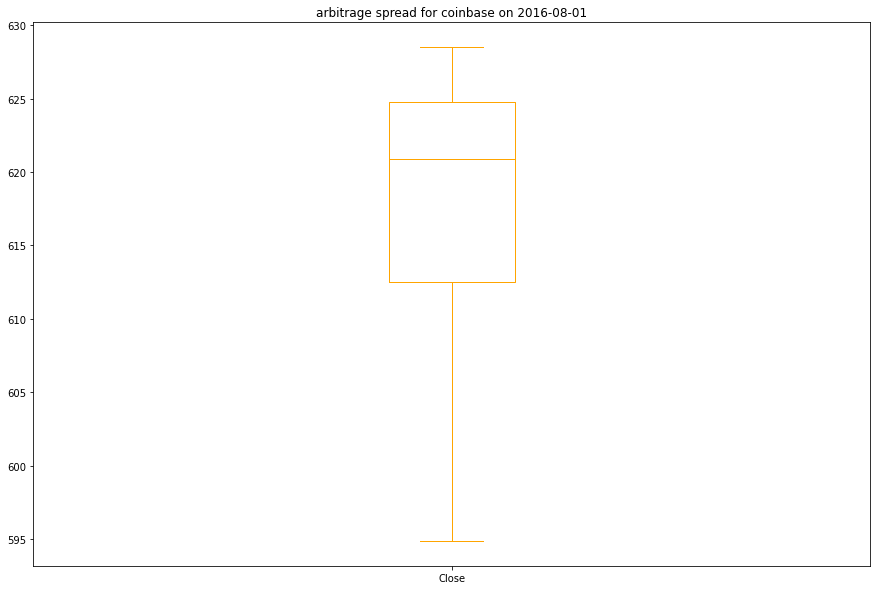

In [31]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
bitstamp_sliced.loc['2016-08-01'].plot(legend=True, kind='box', figsize=(15,10), color= 'blue', title = 'arbitrage spread for bistamp on 2016-08-01', label = 'bitstamp')
coinbase_sliced.loc['2016-08-01'].plot(legend= True, kind='box', figsize=(15,10), color='orange', label = 'coinbase', title = 'arbitrage spread for coinbase on 2016-08-01')


<AxesSubplot:title={'center':'bitstamp vs. coinbase on 2017-06-01'}, xlabel='Timestamp'>

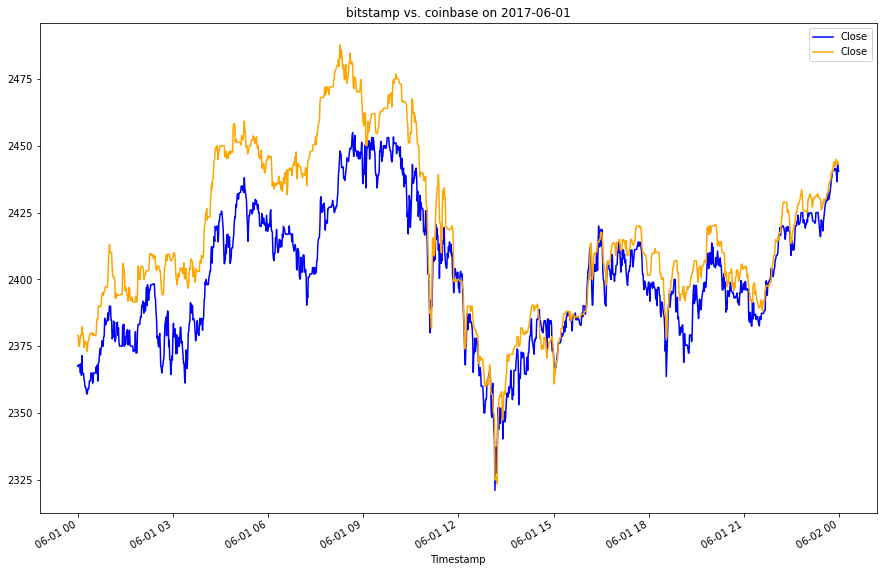

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2017-06-01'].plot(legend=True, kind='line',figsize=(15,10),title=
                                            'bitstamp vs. coinbase on 2017-06-01', color= 'blue', label= 'bitstamp')
coinbase_sliced.loc['2017-06-01'].plot(legend= True, kind='line', figsize=(15,10), color='orange', label= 'coinbase', ax=ax)

In [33]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2017-06-01'] - bitstamp_sliced.loc['2017-06-01'] 

# Generate summary statistics for the middle DataFrame
display(arbitrage_spread_middle.describe())


,Close
count,1426.000000
mean,14.923647
std,12.358508
min,-11.440000
25%,5.957500
50%,12.700000
75%,22.542500
max,52.510000


<AxesSubplot:title={'center':'arbitrage spread for coinbase on 2016-08-01on 2017-06-01'}>

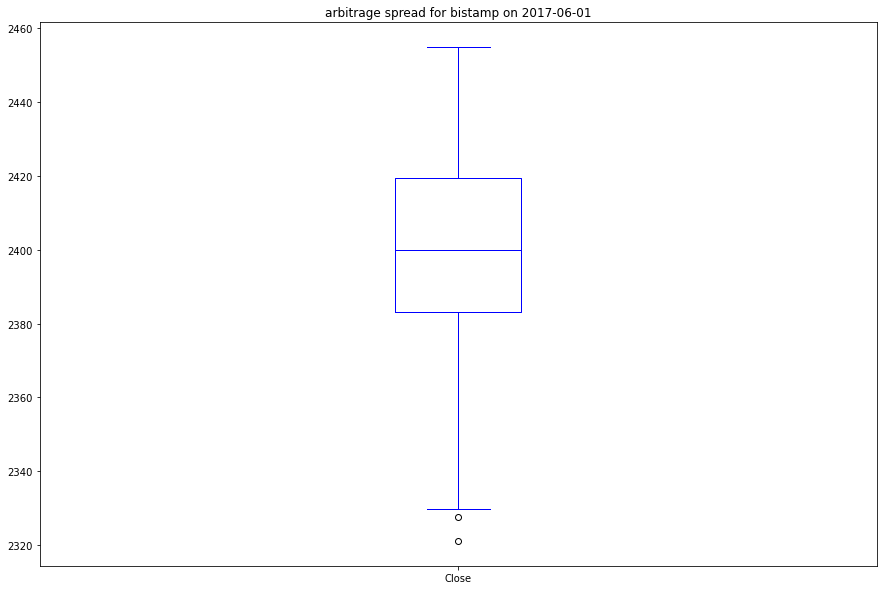

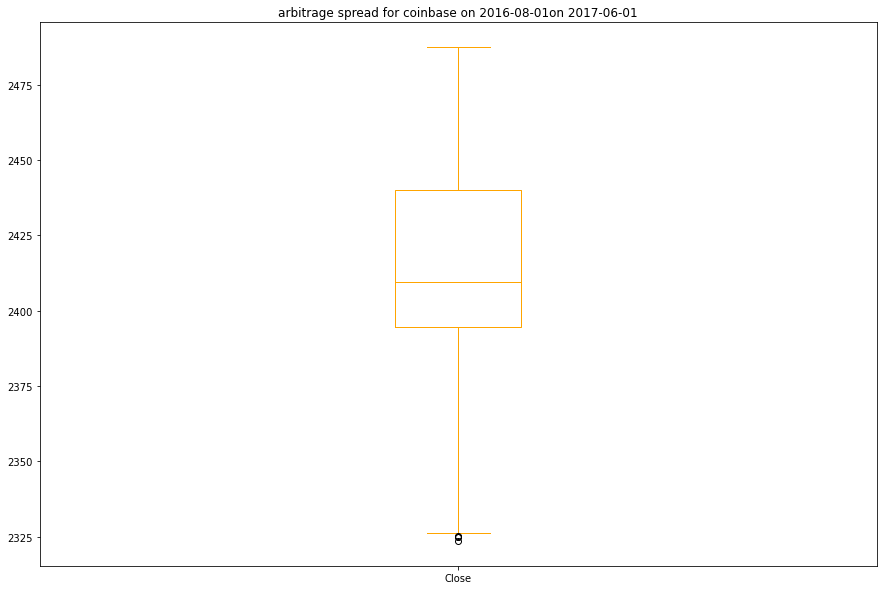

In [34]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
bitstamp_sliced.loc['2017-06-01'].plot(legend=True, kind='box', figsize=(15,10), color= 'blue', title = 'arbitrage spread for bistamp on 2017-06-01', label = 'bitstamp')
coinbase_sliced.loc['2017-06-01'].plot(legend= True, kind='box', figsize=(15,10), color='orange', label = 'coinbase', 
                                       title = 'arbitrage spread for coinbase on 2016-08-01on 2017-06-01')



<AxesSubplot:title={'center':'bitstamp vs. coinbase on 2018-10-01'}, xlabel='Timestamp'>

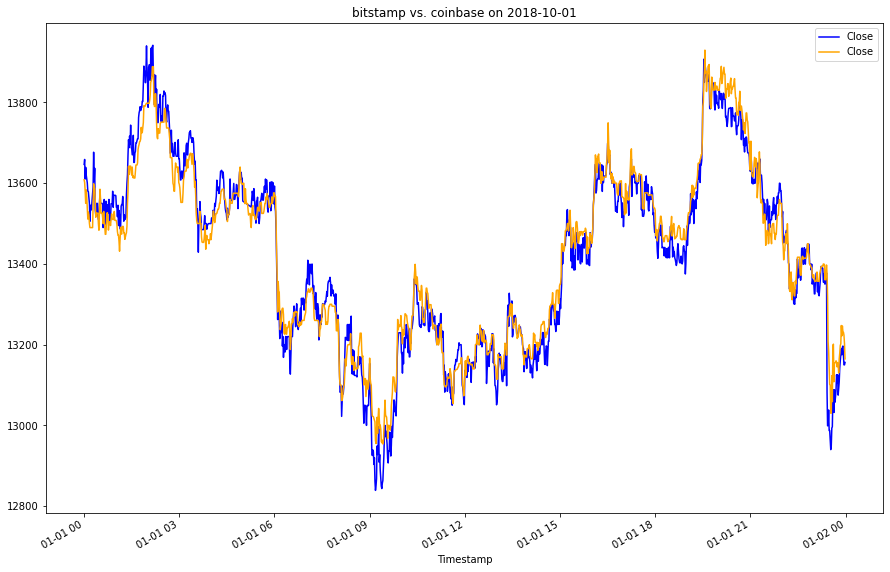

In [35]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-01-01'].plot(legend=True, kind='line',figsize=(15,10),title=
                                            'bitstamp vs. coinbase on 2018-10-01', color= 'blue', label= 'bitstamp')
coinbase_sliced.loc['2018-01-01'].plot(legend= True, kind='line', figsize=(15,10), color='orange', label= 'coinbase', ax=ax)


In [36]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-01-01'] - bitstamp_sliced.loc['2018-01-01'] 

# Generate summary statistics for the late DataFrame
display(arbitrage_spread_late.describe())


,Close
count,1421.000000
mean,5.767368
std,46.214511
min,-142.000000
25%,-26.890000
50%,5.480000
75%,36.000000
max,319.990000


<AxesSubplot:title={'center':'arbitrage spread for coinbase on 2018-01-01'}>

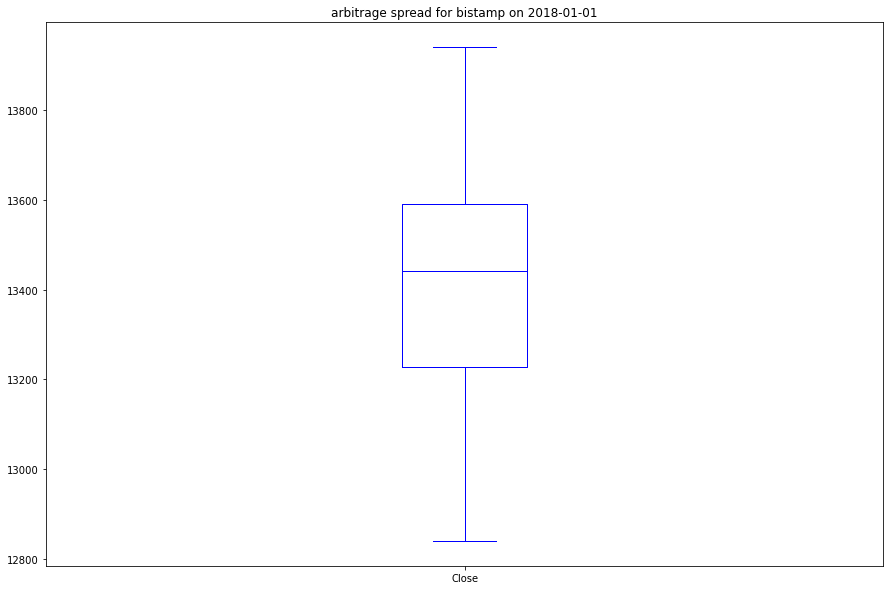

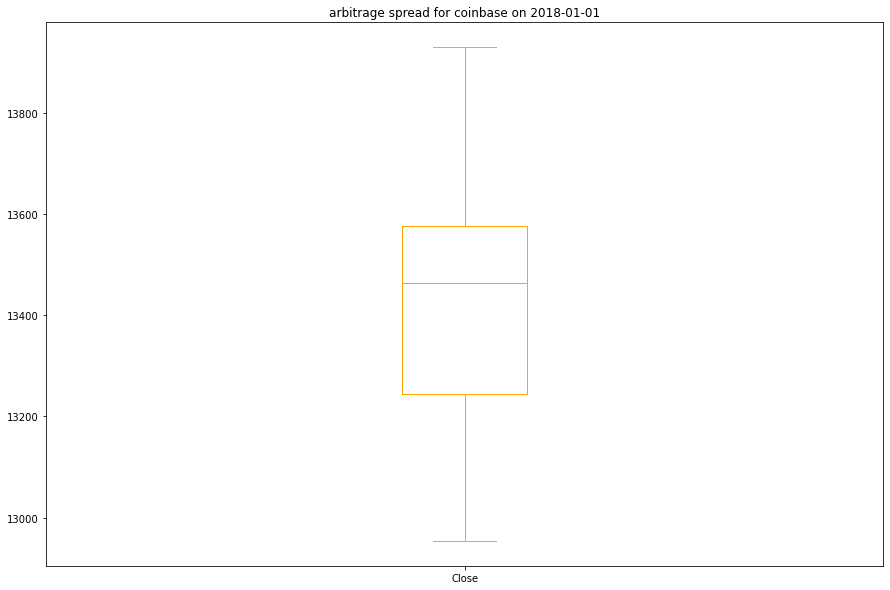

In [37]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
bitstamp_sliced.loc['2018-01-01'].plot(legend=True, kind='box', figsize=(15,10), color= 'blue', title = 'arbitrage spread for bistamp on 2018-01-01', label = 'bitstamp')
coinbase_sliced.loc['2018-01-01'].plot(legend= True, kind='box', figsize=(15,10), color='orange', label = 'coinbase', 
                                       title = 'arbitrage spread for coinbase on 2018-01-01')


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [38]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc['2016-08-01'] - bitstamp_sliced.loc['2016-08-01']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitble_trades_early = arbitrage_spread_early[arbitrage_spread_early>0]

profitble_trades_early.describe()

,Close
count,533.000000
mean,1.795497
std,1.284731
min,0.010000
25%,0.740000
50%,1.600000
75%,2.650000
max,6.410000


In [39]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced.loc['2017-06-01'] - bitstamp_sliced.loc['2017-06-01']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitble_trades_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]
profitble_trades_middle.describe()

,Close
count,1317.000000
mean,16.447130
std,11.588122
min,0.040000
25%,7.210000
50%,14.000000
75%,23.830000
max,52.510000


In [40]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced.loc['2018-01-01'] - bitstamp_sliced.loc['2018-01-01']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitble_trades_late = arbitrage_spread_late[arbitrage_spread_late>0]
profitble_trades_late.describe()


,Close
count,782.000000
mean,38.672634
std,31.451187
min,0.010000
25%,15.950000
50%,32.610000
75%,53.627500
max,319.990000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [41]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = profitble_trades_early / bitstamp_sliced.loc['2016-08-01']
spread_return_early.dropna(inplace=True)
# Review the spread return DataFrame
spread_return_early.head()



,Close
Timestamp,
2016-08-01 00:10:00,0.000129
2016-08-01 00:11:00,0.000113
2016-08-01 00:12:00,0.001205
2016-08-01 00:13:00,0.001222
2016-08-01 00:25:00,0.002869


In [42]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle =profitble_trades_middle / bitstamp_sliced.loc['2017-06-01']
spread_return_middle.dropna(inplace=True)
# Review the spread return DataFrame
spread_return_middle.head()


,Close
Timestamp,
2017-06-01 00:00:00,0.004802
2017-06-01 00:01:00,0.004930
2017-06-01 00:02:00,0.002905
2017-06-01 00:03:00,0.002918
2017-06-01 00:04:00,0.003632


In [43]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = profitble_trades_late / bitstamp_sliced.loc['2018-01-01']
spread_return_late.dropna(inplace=True)
# Review the spread return DataFrame
spread_return_late.head()

,Close
Timestamp,
2018-01-01 00:21:00,0.001852
2018-01-01 00:24:00,0.000371
2018-01-01 00:26:00,0.000423
2018-01-01 00:30:00,0.000594
2018-01-01 00:31:00,0.000886


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [44]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]
profitable_trades_early.dropna(inplace=True)
# Review the first five profitable trades
profitable_trades_early.head()


,Close
Timestamp,
2016-08-01 01:03:00,0.010304


In [45]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
profitable_trades_middle.dropna(inplace=True)
# Review the first five profitable trades
profitable_trades_middle.head()


,Close
Timestamp,
2017-06-01 01:03:00,0.010571
2017-06-01 01:04:00,0.010563
2017-06-01 01:05:00,0.011477
2017-06-01 01:26:00,0.011349
2017-06-01 01:28:00,0.012063


In [46]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late>0.01]
profitble_trades_late.dropna(inplace=True)
# Review the first five profitable trades
profitable_trades_late.describe()


,Close
count,7.000000
mean,0.015453
std,0.005833
min,0.010427
25%,0.011358
50%,0.012001
75%,0.019207
max,0.024616


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [47]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()


,Close
count,1.000000
mean,0.010304
std,NaN
min,0.010304
25%,0.010304
50%,0.010304
75%,0.010304
max,0.010304


In [48]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()


,Close
count,315.000000
mean,0.013733
std,0.003252
min,0.010022
25%,0.010953
50%,0.012711
75%,0.016139
max,0.021631


In [49]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()


,Close
count,7.000000
mean,0.015453
std,0.005833
min,0.010427
25%,0.011358
50%,0.012001
75%,0.019207
max,0.024616


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [50]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc['2016-08-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early


,Close
Timestamp,
2016-08-01 01:03:00,6.41


In [51]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced.loc['2017-06-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

,Close
Timestamp,
2017-06-01 01:03:00,25.21
2017-06-01 01:04:00,25.19
2017-06-01 01:05:00,27.29
2017-06-01 01:26:00,27.00
2017-06-01 01:28:00,28.65
...,...
2017-06-01 11:22:00,28.30
2017-06-01 19:06:00,28.43
2017-06-01 19:15:00,24.77


In [52]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced.loc['2018-01-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

,Close
Timestamp,
2018-01-01 09:10:00,147.33
2018-01-01 23:25:00,293.89
2018-01-01 23:26:00,319.99
2018-01-01 23:27:00,207.33
2018-01-01 23:28:00,146.82
2018-01-01 23:29:00,155.86
2018-01-01 23:31:00,135.18


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [53]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()


,Close
count,1.00
mean,6.41
std,NaN
min,6.41
25%,6.41
50%,6.41
75%,6.41
max,6.41


<AxesSubplot:title={'center':'Profit per trade on 2016-08-01'}, xlabel='Timestamp'>

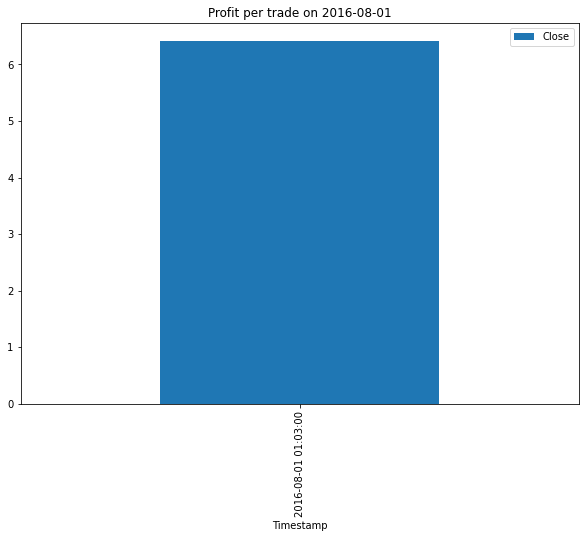

In [54]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(figsize=(10,7), title='Profit per trade on 2016-08-01', kind='bar')


In [55]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()


,Close
count,315.000000
mean,33.131460
std,7.869171
min,23.840000
25%,26.395000
50%,30.430000
75%,39.060000
max,52.510000


<AxesSubplot:title={'center':'Profit per trade on 2017-06-01'}, xlabel='Timestamp'>

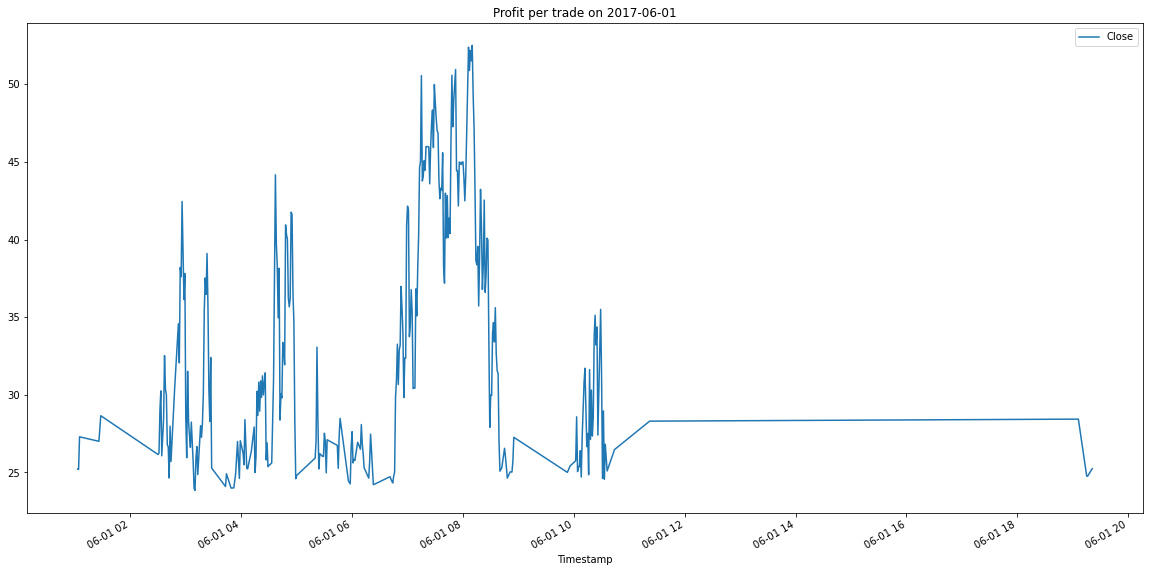

In [56]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot( figsize=(20,10), title='Profit per trade on 2017-06-01', label='profit per trade')


In [57]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

,Close
count,7.000000
mean,200.914286
std,76.390469
min,135.180000
25%,147.075000
50%,155.860000
75%,250.610000
max,319.990000


<AxesSubplot:title={'center':'Profit per trade on 2018-01-01'}, xlabel='Timestamp'>

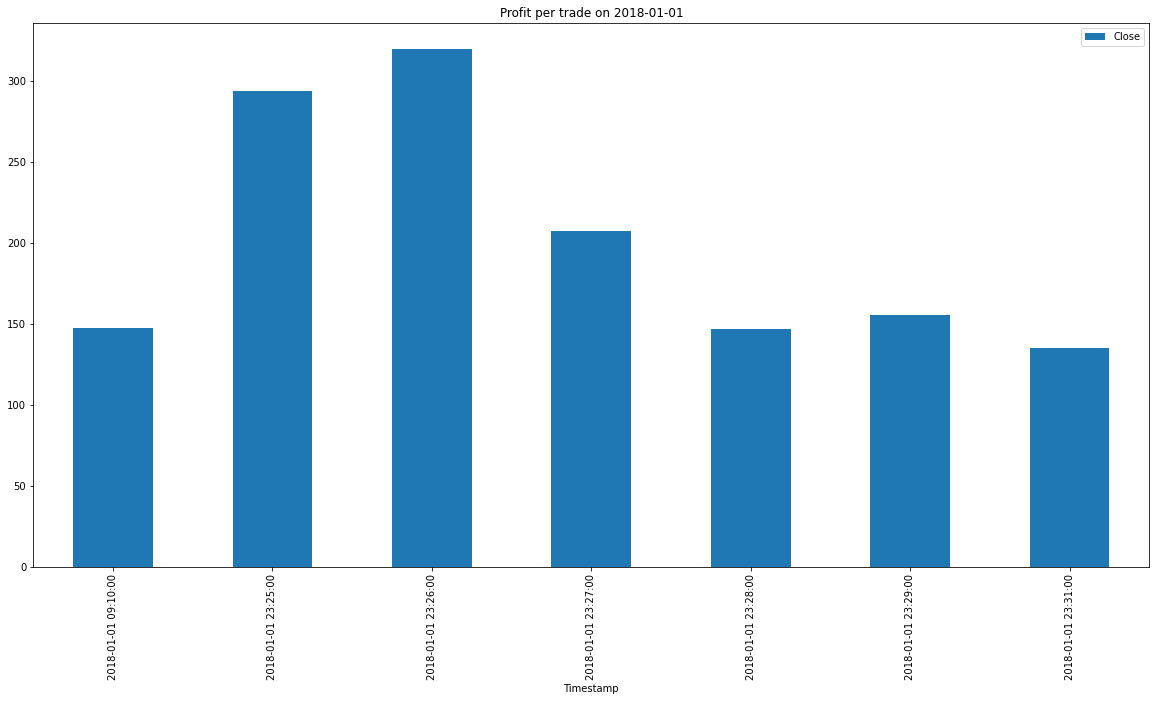

In [58]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(kind='bar', figsize=(20,10), title='Profit per trade on 2018-01-01')


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [59]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early_sum = profit_per_trade_early.sum()
profit_early_sum

Close    6.41
dtype: float64

In [60]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_middle_sum = profit_per_trade_middle.sum()
profit_middle_sum

Close    10436.41
dtype: float64

In [61]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_late_sum = profit_per_trade_late.sum()
profit_late_sum

Close    1406.4
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [62]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early_sum.cumsum()
cumulative_profit_early

Close    6.41
dtype: float64

<AxesSubplot:title={'center':'Cumulated profit on 2016-08-01'}>

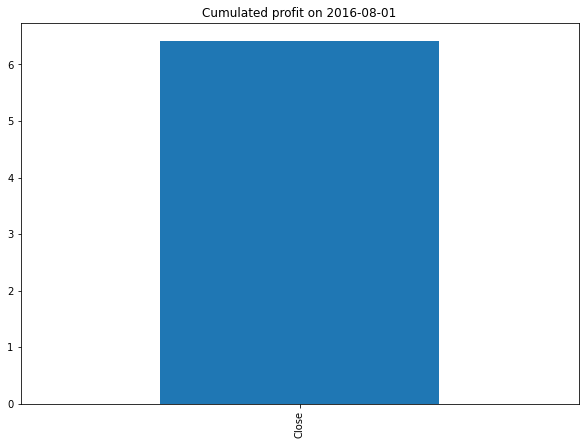

In [63]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(kind='bar', title='Cumulated profit on 2016-08-01', figsize=(10,7))

In [64]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_middle_sum.cumsum()
cumulative_profit_middle

Close    10436.41
dtype: float64

<AxesSubplot:title={'center':'Cumulated profit on 2017-06-01'}>

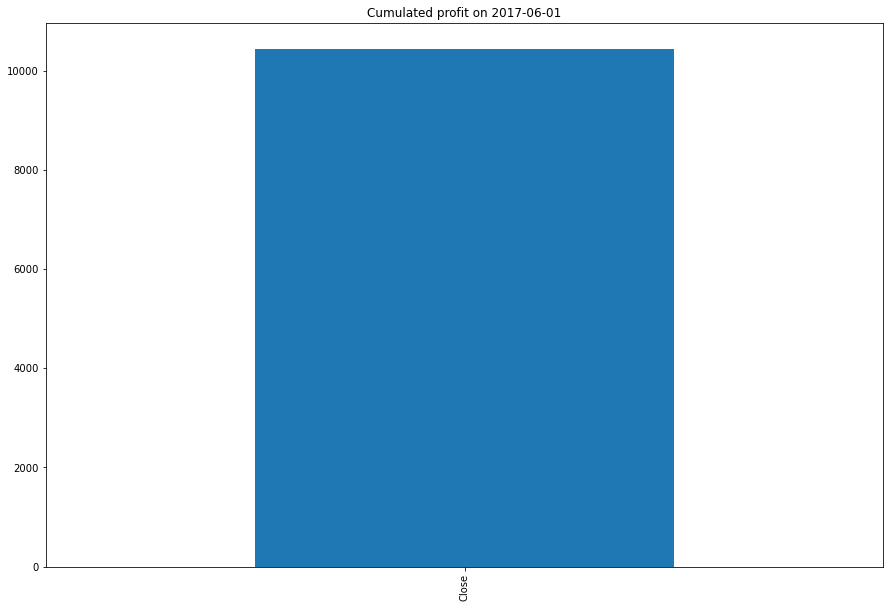

In [65]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(kind='bar', figsize=(15,10), title='Cumulated profit on 2017-06-01')


In [66]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_late_sum.cumsum()
cumulative_profit_late


Close    1406.4
dtype: float64

<AxesSubplot:title={'center':'Cumulated profit on 2018-01-01'}>

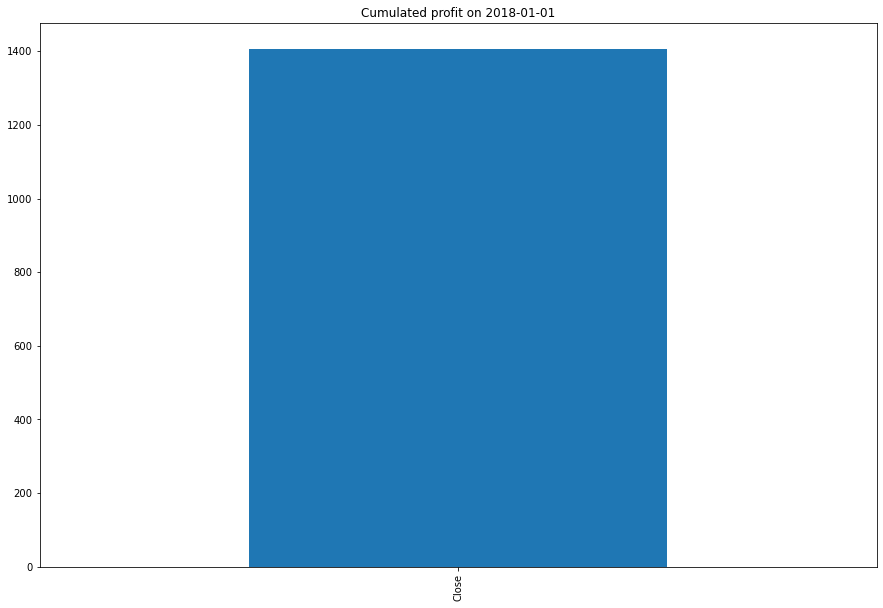

In [67]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(kind='bar', figsize=(15,10), title='Cumulated profit on 2018-01-01')


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.

Summary:

The whole purpose of this program is to find if there's a possible and easy way to arbitrage trade two crypto currencies.

Along with coding, I can tell there're no significant changes between these two crypto currencies according to the 'bitstamp vs. coinbase' graph. It seems like their moving trends are the same, therefore, it is too hard to find a spot to make the trade with significant profit potential inside.

When it comes to the middle part of the code, I can find some periods that both crypto currencies are very volatile in the middle of the data. But their moving trend becomes very narrow at the end of the data.

According to graph 'Profit per trade on 2017-06-01', the number of profitable trades that can cover the cost increased. 

But it is still difficult to find a point where the price difference exceeds the minimum profit threshold of 1%.